In [1]:
%matplotlib inline
import networkx as nx
import networkx.algorithms.connectivity as nxconn # <-- 連結度計算に必要

グラフの連結性と連結度

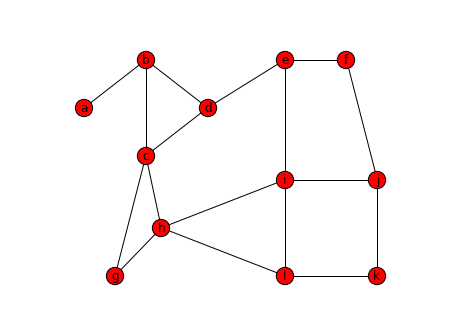

In [2]:
# 無向グラフの作成
G1 = nx.Graph()
nodelist = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l']
G1.add_nodes_from(nodelist)
G1.add_edges_from([('a', 'b'), 
                   ('b', 'c'), ('b', 'd'),
                   ('c', 'd'), ('c', 'g'), ('c', 'h'),
                   ('d', 'e'), 
                   ('e', 'f'), ('e', 'i'),
                   ('f', 'j'),
                   ('g', 'h'),
                   ('h', 'i'), ('h', 'l'), 
                   ('i', 'j'), ('i', 'l'),
                   ('j', 'k'),
                   ('k', 'l')])
mypos1 = {'a': (0, 20),
          'b': (10, 25),
          'c': (10, 15),
          'd': (20, 20),
          'e': (32.5, 25),
          'f': (42.5, 25),
          'g': (5, 2.5), 
          'h': (12.5, 7.5), 
          'i': (32.5, 12.5), 
          'j': (47.5, 12.5), 
          'k': (47.5, 2.5), 
          'l': (32.5, 2.5)}
nx.draw(G1, pos=mypos1, with_labels = True)

In [3]:
# 局所辺連結度の計算
nxconn.local_edge_connectivity(G1, 'b', 'j')

2

In [4]:
# 大域辺連結度の計算
nxconn.edge_connectivity(G1)

1

In [5]:
# 局所点連結度の計算
nxconn.local_node_connectivity(G1, 'g', 'k')

2

In [6]:
# 大域点連結度の計算
nxconn.node_connectivity(G1)

1

In [7]:
# 完全グラフの大域点連結度は？
nxconn.node_connectivity(nx.complete_graph(10))

9

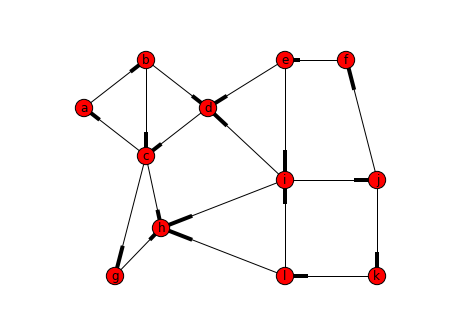

In [8]:
# 有向グラフの作成 (強連結ではない)
D1 = nx.DiGraph()
D1.add_nodes_from(nodelist)
D1.add_edges_from([('a', 'b'), 
                   ('b', 'c'), ('b', 'd'),
                   ('c', 'a'), ('c', 'g'), ('c', 'h'),
                   ('d', 'c'), 
                   ('e', 'd'), ('e', 'i'),
                   ('f', 'e'),
                   ('g', 'h'), 
                   ('i', 'd'), ('i', 'h'), ('i', 'j'), 
                   ('j', 'f'), ('j', 'k'),
                   ('k', 'l'),
                   ('l', 'h'), ('l', 'i')])
nx.draw(D1, pos=mypos1, with_labels = True)

In [9]:
# 強連結性の判定
nx.is_strongly_connected(D1)

False

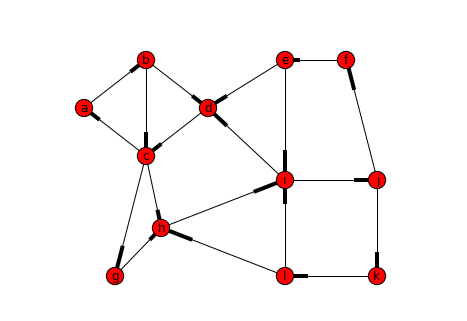

In [10]:
# 有向グラフの作成 (強連結である)
D2 = nx.DiGraph()
D2.add_nodes_from(nodelist)
D2.add_edges_from([('a', 'b'), 
                   ('b', 'c'), ('b', 'd'),
                   ('c', 'a'), ('c', 'g'), ('c', 'h'),
                   ('d', 'c'), 
                   ('e', 'd'), ('e', 'i'),
                   ('f', 'e'),
                   ('g', 'h'), 
                   ('h', 'i'),
                   ('i', 'd'), ('i', 'j'), 
                   ('j', 'f'), ('j', 'k'),
                   ('k', 'l'),
                   ('l', 'h'), ('l', 'i')])
nx.draw(D2, pos=mypos1, with_labels = True)

In [11]:
# 強連結性の判定
nx.is_strongly_connected(D2)

True

In [12]:
# 局所弧連結度の計算
nxconn.local_edge_connectivity(D2, 'e', 'k')

1

In [13]:
# 始点，終点を入れ替えても，局所弧連結度は変わらないか？
nxconn.local_edge_connectivity(D2, 'b', 'h') == nxconn.local_edge_connectivity(D2, 'h', 'b')

False

In [14]:
# 大域弧連結度の計算
nxconn.edge_connectivity(D2)

1

In [15]:
# 局所点連結度の計算
nxconn.local_node_connectivity(D2, 'c', 'i')

1

In [16]:
# 大域点連結度の計算
nxconn.node_connectivity(D2)

1

連結度と互いに素な道の双対性：Mengerの定理

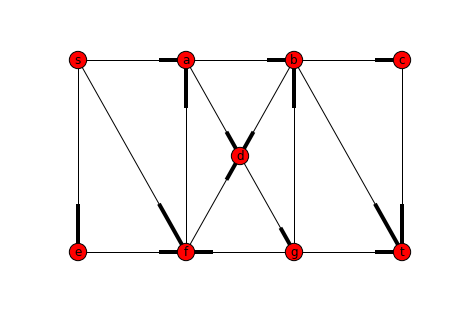

In [17]:
# 有向グラフの構成
D3 = nx.DiGraph()
D3.add_nodes_from(['s', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 't'])
D3.add_edges_from([('s', 'a'), ('s', 'e'), ('s', 'f'),
                   ('a', 'b'), ('a', 'd'),
                   ('b', 'c'), ('b', 'd'), ('b', 't'),
                   ('c', 't'),
                   ('d', 'g'),
                   ('e', 'f'),
                   ('f', 'a'), ('f', 'd'),
                   ('g', 'b'), ('g', 'f'), ('g', 't')])
mypos3 = {'s': (0, 20),
          'a': (10, 20),
          'b': (20, 20),
          'c': (30, 20),
          'd': (15, 10),
          'e': (0, 0),
          'f': (10, 0),
          'g': (20, 0),
          't': (30, 0)}
nx.draw(D3, pos = mypos3, with_labels = True)

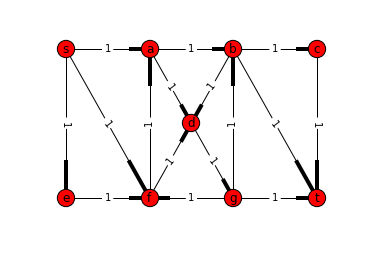

In [18]:
# 局所弧連結度の計算を最大流問題としてモデル化する
D3fe = nxconn.build_auxiliary_edge_connectivity(D3)
cap3fe = {}
for e in D3fe.edges():
    cap3fe[e] = D3fe.get_edge_data(*e)['capacity']
nx.draw(D3fe, pos=mypos3, edge_labels = nx.draw_networkx_edge_labels(D3, pos = mypos3, edge_labels = cap3fe), with_labels = True)

In [19]:
# 最大流の計算
f3fe = nx.maximum_flow(D3fe, 's', 't')
print(f3fe)

(2, {'c': {'t': 0}, 'd': {'g': 1}, 's': {'e': 1, 'f': 0, 'a': 1}, 'f': {'d': 0, 'a': 1}, 'a': {'b': 1, 'd': 1}, 't': {}, 'e': {'f': 1}, 'g': {'b': 0, 't': 1, 'f': 0}, 'b': {'t': 1, 'c': 0, 'd': 0}})


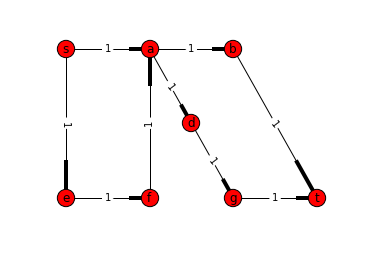

In [20]:
# 最大流の表示
D3fef = nx.DiGraph()
D3fef.add_nodes_from(D3fef.nodes())
for v in f3fe[1].keys():
    for u in f3fe[1][v]:
        if f3fe[1][v][u] != 0:
            D3fef.add_edge(v, u, {'flow': f3fe[1][v][u]})
flow3fe = {}
for e in D3fef.edges():
    flow3fe[e] = D3fef.get_edge_data(*e)['flow']
nx.draw(D3fef, pos = mypos3, edge_labels = nx.draw_networkx_edge_labels(D3fef, pos = mypos3, edge_labels = flow3fe), with_labels = True)

In [21]:
# 最小s,tカットの計算
cut3fe = nx.minimum_cut(D3fe, 's', 't')
print(cut3fe)

(2, ({'e', 'd', 's', 'f', 'a'}, {'t', 'c', 'b', 'g'}))


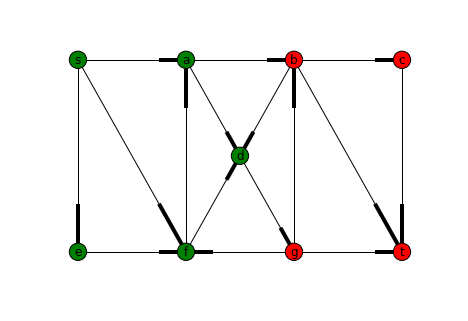

In [22]:
# 最小s,tカットの表示
nodecolor_cut3fe = list(map(lambda v: 'g' if v in cut3fe[1][0] else 'r', D3fe.nodes()))
nx.draw(D3fe, pos = mypos3, node_color = nodecolor_cut3fe, with_labels=True)

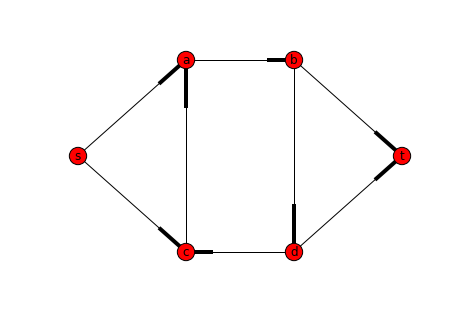

In [23]:
# 有向グラフの作成
D4 = nx.DiGraph()
D4.add_nodes_from(['s', 'a', 'b', 'c', 'd', 't'])
D4.add_edges_from([('s', 'a'), ('s', 'c'), 
                   ('a', 'b'),
                   ('b', 'd'), ('b', 't'),
                   ('c', 'a'),
                   ('d', 'c'), ('d', 't')])
mypos4 = {'s': (0, 10),
          'a': (10, 20),
          'b': (20, 20),
          'c': (10, 0),
          'd': (20, 0),
          't': (30, 10)}
nx.draw(D4, pos = mypos4, with_labels = True)

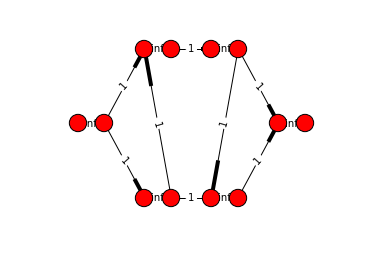

In [24]:
# 局所点連結度の計算を最大流問題としてモデル化する
# build_auxiliary_node_connectivity は頂点ラベルを変な形にかえてしまうので，対応するものを自分で実装した
def my_build_auxiliary_node_connectivity(G):
    directed = G.is_directed()
    H = nx.DiGraph()    
    for v in G.nodes_iter():
        H.add_node((v, 'A'))
        H.add_node((v, 'B'))
        H.add_edge((v, 'A'), (v, 'B'), {"capacity": float("inf")})
    for (source, target) in G.edges_iter():
        H.add_edge((source, 'B'), (target, 'A'), {"capacity": 1})
        if not directed:
            H.add_edge((target, 'B'), (source, 'A'), {"capacity": 1})
    return H

D4fv = my_build_auxiliary_node_connectivity(D4)
cap4fv = {}
for e in D4fv.edges():
    cap4fv[e] = D4fv.get_edge_data(*e)['capacity']
mypos4fv = {}
for v in D4.nodes():
    mypos4fv[(v, 'A')] = (mypos4[v][0]-2, mypos4[v][1])
    mypos4fv[(v, 'B')] = (mypos4[v][0]+2, mypos4[v][1])
cap4fv = {}
for e in D4fv.edges():
    cap4fv[e] = D4fv.get_edge_data(*e)['capacity']
nx.draw(D4fv, pos = mypos4fv, edge_labels = nx.draw_networkx_edge_labels(D4fv, pos = mypos4fv, edge_labels = cap4fv))

In [25]:
# 最大流の計算
f4fv = nx.maximum_flow(D4fv, ('s', 'A'), ('t', 'B'))
print(f4fv)

(1, {('s', 'A'): {('s', 'B'): 1}, ('b', 'A'): {('b', 'B'): 1}, ('a', 'A'): {('a', 'B'): 1}, ('s', 'B'): {('c', 'A'): 1, ('a', 'A'): 0}, ('a', 'B'): {('b', 'A'): 1}, ('c', 'B'): {('a', 'A'): 1}, ('b', 'B'): {('t', 'A'): 1, ('d', 'A'): 0}, ('c', 'A'): {('c', 'B'): 1}, ('d', 'B'): {('c', 'A'): 0, ('t', 'A'): 0}, ('t', 'A'): {('t', 'B'): 1}, ('d', 'A'): {('d', 'B'): 0}, ('t', 'B'): {}})


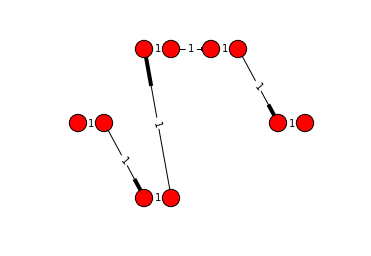

In [26]:
# 最大流の表示
D4fvf = nx.DiGraph()
D4fvf.add_nodes_from(D4fvf.nodes())
for v in f4fv[1].keys():
    for u in f4fv[1][v]:
        if f4fv[1][v][u] != 0:
            D4fvf.add_edge(v, u, {'flow': f4fv[1][v][u]})
flow4fv = {}
for e in D4fvf.edges():
    flow4fv[e] = D4fvf.get_edge_data(*e)['flow']
nx.draw(D4fvf, pos = mypos4fv, edge_labels = nx.draw_networkx_edge_labels(D4fvf, pos = mypos4fv, edge_labels = flow4fv))

In [27]:
# 最小s,tカットの計算
cut4fv = nx.minimum_cut(D4fv, ('s', 'A'), ('t', 'B'))
print(cut4fv)

(1, ({('s', 'A'), ('a', 'B'), ('s', 'B'), ('a', 'A'), ('c', 'B'), ('c', 'A')}, {('b', 'B'), ('t', 'A'), ('b', 'A'), ('d', 'A'), ('d', 'B'), ('t', 'B')}))


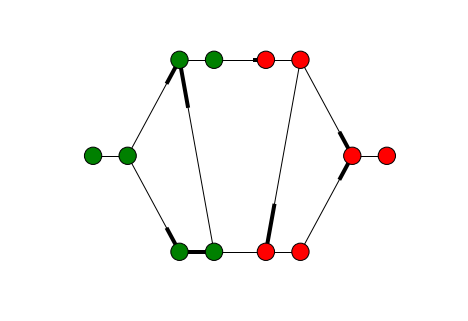

In [28]:
# 最小s,tカットの表示
nodecolor_cut4fv = list(map(lambda v: 'g' if v in cut4fv[1][0] else 'r', D4fv.nodes()))
nx.draw(D4fv, pos = mypos4fv, node_color = nodecolor_cut4fv)